# Machine Learning Experiments

## K-Means

### Import libraries

In [2]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [3]:
X = pd.read_csv('./X_dataset.csv')

In [4]:
X.head(3)

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933


In [5]:
# Define the K values to be tested
k_values = np.arange(2, 21, 1)

# List to store the results
kmeans_results = []

# Loop to test each K value
for k in k_values:
    # Instantiate the K-Means model with the current K value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Train the model on the training data (without labels)
    kmeans.fit(X)
    
    # Make predictions (assign each point to a cluster)
    cluster_labels = kmeans.predict(X)
    
    # Calculate the Silhouette Score for the current K value
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Store the results
    kmeans_results.append({
        'K': k,
        'Silhouette Score': round(silhouette_avg, 3)
    })

# Display the results
for result in kmeans_results:
    print(f"K={result['K']} | Silhouette Score: {result['Silhouette Score']}")

  File "C:\Users\rafae\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


K=2 | Silhouette Score: 0.192
K=3 | Silhouette Score: 0.232
K=4 | Silhouette Score: 0.205
K=5 | Silhouette Score: 0.206
K=6 | Silhouette Score: 0.166
K=7 | Silhouette Score: 0.17
K=8 | Silhouette Score: 0.188
K=9 | Silhouette Score: 0.158
K=10 | Silhouette Score: 0.158
K=11 | Silhouette Score: 0.179
K=12 | Silhouette Score: 0.167
K=13 | Silhouette Score: 0.153
K=14 | Silhouette Score: 0.152
K=15 | Silhouette Score: 0.134
K=16 | Silhouette Score: 0.16
K=17 | Silhouette Score: 0.148
K=18 | Silhouette Score: 0.152
K=19 | Silhouette Score: 0.17
K=20 | Silhouette Score: 0.167


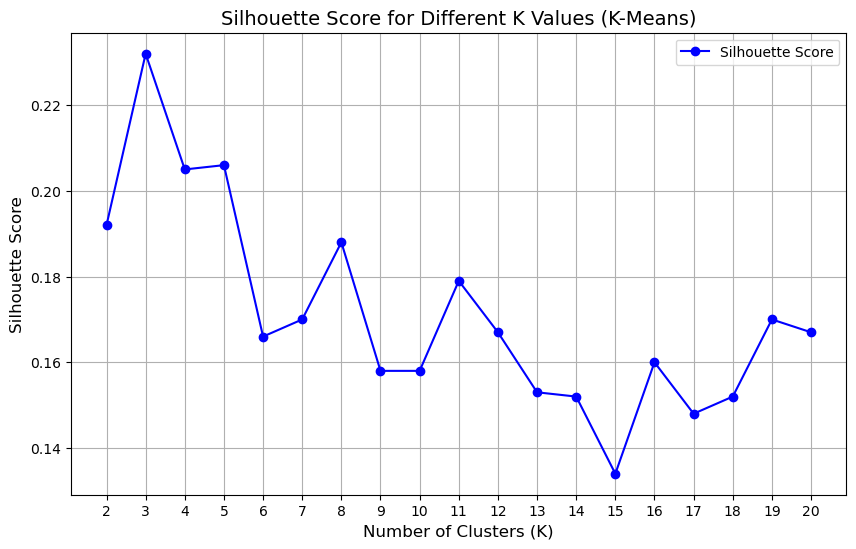

In [7]:
# Extracting the Silhouette Score values for the plot
silhouette_scores = [result['Silhouette Score'] for result in kmeans_results]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')

# Adding titles and labels
plt.title('Silhouette Score for Different K Values (K-Means)', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.legend()

# Displaying the plot
plt.show()

In [8]:
# Find the result with the best metrics
best_result_kmeans = max(kmeans_results, key=lambda x: (x['Silhouette Score']))

# Store the best K and the corresponding metrics in variables
best_k_kmeans = best_result_kmeans['K']
best_ss_kmeans = best_result_kmeans['Silhouette Score']

# Display the best K value and the corresponding metrics
print(f"Best K={best_k_kmeans} "
      f"| Silhouette Score: {best_ss_kmeans}")

Best K=3 | Silhouette Score: 0.232


## Affinity Propagation

In [9]:
# Define the preference values to be tested
preference_values = np.arange(-1, -50, -1)

# List to store the results
affinity_results = []
n_clusters_list = []

# Loop to test each preference value
for preference in preference_values:
    # Instantiate the Affinity Propagation model with the current preference value
    affinity = AffinityPropagation(preference=preference)
    
    # Train the model on the training data (without labels)
    affinity.fit(X)
    
    # Make predictions (assign each point to a cluster)
    cluster_labels_ap = affinity.predict(X)
    
    # Check the number of clusters generated
    n_clusters = len(set(cluster_labels_ap))
    n_clusters_list.append(n_clusters)
    
    # Calculate the Silhouette Score for the current preference value
    silhouette_avg = silhouette_score(X, cluster_labels_ap)
    
    # Store the results
    affinity_results.append({
        'Preference': preference,
        'Silhouette Score': round(silhouette_avg, 3),
        'Clusters': n_clusters
    })

# Display the results
for result in affinity_results:
    print(f"Preference={result['Preference']} | Silhouette Score: {result['Silhouette Score']} | Clusters: {result['Clusters']}")

Preference=-1 | Silhouette Score: 0.047 | Clusters: 154
Preference=-2 | Silhouette Score: 0.121 | Clusters: 86
Preference=-3 | Silhouette Score: 0.148 | Clusters: 62
Preference=-4 | Silhouette Score: 0.157 | Clusters: 45
Preference=-5 | Silhouette Score: 0.164 | Clusters: 41
Preference=-6 | Silhouette Score: 0.165 | Clusters: 35
Preference=-7 | Silhouette Score: 0.174 | Clusters: 31
Preference=-8 | Silhouette Score: 0.168 | Clusters: 29
Preference=-9 | Silhouette Score: 0.171 | Clusters: 27
Preference=-10 | Silhouette Score: 0.171 | Clusters: 25
Preference=-11 | Silhouette Score: 0.172 | Clusters: 21
Preference=-12 | Silhouette Score: 0.169 | Clusters: 18
Preference=-13 | Silhouette Score: 0.169 | Clusters: 17
Preference=-14 | Silhouette Score: 0.169 | Clusters: 16
Preference=-15 | Silhouette Score: 0.161 | Clusters: 13
Preference=-16 | Silhouette Score: 0.16 | Clusters: 12
Preference=-17 | Silhouette Score: 0.16 | Clusters: 12
Preference=-18 | Silhouette Score: 0.155 | Clusters: 12
Pr

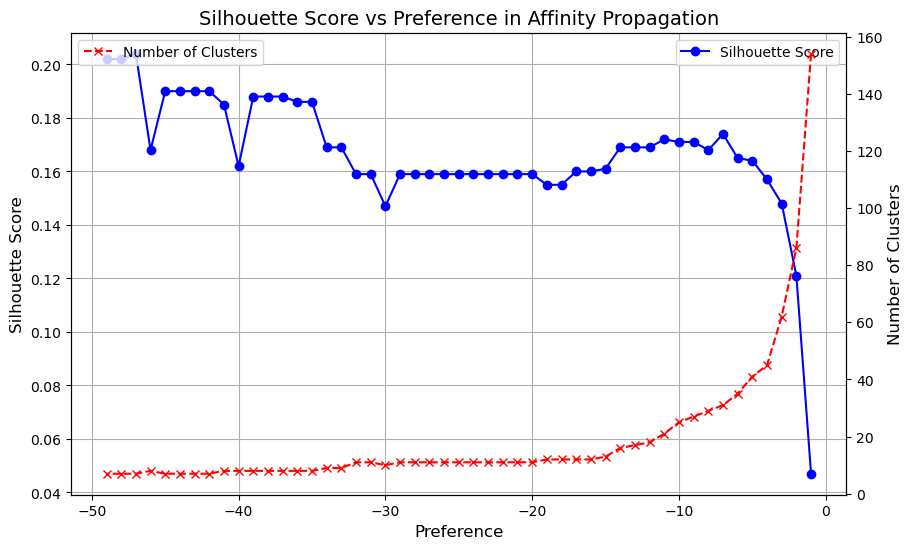

In [10]:
# Prepare the data for the plot
preferences = [result['Preference'] for result in affinity_results]
silhouette_scores = [result['Silhouette Score'] for result in affinity_results]
clusters = [result['Clusters'] for result in affinity_results]

# Create the Silhouette Score vs Preference plot
plt.figure(figsize=(10, 6))
plt.plot(preferences, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.title('Silhouette Score vs Preference in Affinity Propagation', fontsize=14)
plt.xlabel('Preference', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.legend()

# Create a Clusters vs Preference plot on the same figure
plt.twinx()  # Creates a second Y-axis on the same plot
plt.plot(preferences, clusters, marker='x', linestyle='--', color='r', label='Number of Clusters')
plt.ylabel('Number of Clusters', fontsize=12)
plt.legend(loc='upper left')

# Display the plot
plt.show()

In [11]:
# Find the result with the best metrics
best_result_ap = max(affinity_results, key=lambda x: (x['Silhouette Score']))

# Store the best preference, silhouette score, and cluster metrics in variables
best_preference_ap = best_result_ap['Preference']
best_ss_ap = best_result_ap['Silhouette Score']
best_k_ap = best_result_ap['Clusters']

# Display the best preference value, silhouette score, and cluster count
print(f"Best Preference={best_preference_ap} "
      f"| Silhouette Score: {best_ss_ap}, Clusters: {best_k_ap}")

Best Preference=-47 | Silhouette Score: 0.204, Clusters: 7


## Generating Images for All Clustering Experiments

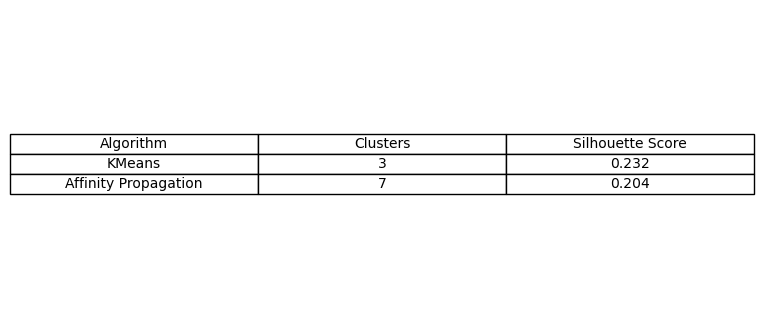

In [12]:
# Data for each algorithm
algorithms = ['KMeans', 'Affinity Propagation']

clusters = [best_k_kmeans, best_k_ap]
silhouette_score = [best_ss_kmeans, best_ss_ap]

# Create a DataFrame with the data
data = {
    'Algorithm': algorithms,
    'Clusters': clusters,
    'Silhouette Score': silhouette_score,
}

df = pd.DataFrame(data)

# Create the table as a figure
fig, ax = plt.subplots(figsize=(8, 4))  # Set the figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjust the font size of the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the cell size

# Save the image
plt.savefig("algorithm_metrics_cluster.png", bbox_inches='tight', dpi=300)

# Display the image
plt.show()